In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://github.com/hannarud/r-plotting/blob/master/Train_UWua5bXk.csv
data = pd.read_csv('Train_UWu5bXk.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
#null removal
data.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
(data.isnull().sum() / len(data)) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [12]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
nulled_p = (data.isnull().sum() / len(data)) * 100
column_names = data.columns
new_columns_names = []
for i in range(0, len(nulled_p)):
    if nulled_p[i] < 20:
        new_columns_names.append(column_names[i])

print(new_columns_names)
data[new_columns_names]

['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


In [19]:
#----------------------------------------------------------------------------------------

In [20]:
#variance
data['Item_Weight'].fillna(data['Item_Weight'].median(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

In [21]:
data['Outlet_Size'].mode()


0    Medium
dtype: object

In [22]:
data.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [23]:
numeric_data = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']]
var = numeric_data.var()
numeric_columns = numeric_data.columns
keep_columns = []
for i in range(0, len(var)):
    if var[i] >= 10:
        keep_columns.append(numeric_columns[i])
print(keep_columns)

['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [24]:
data[keep_columns]

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,249.8092,1999,3735.1380
1,5.920,48.2692,2009,443.4228
2,17.500,141.6180,1999,2097.2700
3,19.200,182.0950,1998,732.3800
4,8.930,53.8614,1987,994.7052
...,...,...,...,...
8518,6.865,214.5218,1987,2778.3834
8519,8.380,108.1570,2002,549.2850
8520,10.600,85.1224,2004,1193.1136
8521,7.210,103.1332,2009,1845.5976


In [18]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [ ]:
#-------------------------------------------------

In [25]:
#factorization
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components=3)
data['Item_Weight'].fillna(data['Item_Weight'].median(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)
numeric_data = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']]
FA = FA.fit(numeric_data)
FA_result = FA.transform(numeric_data)

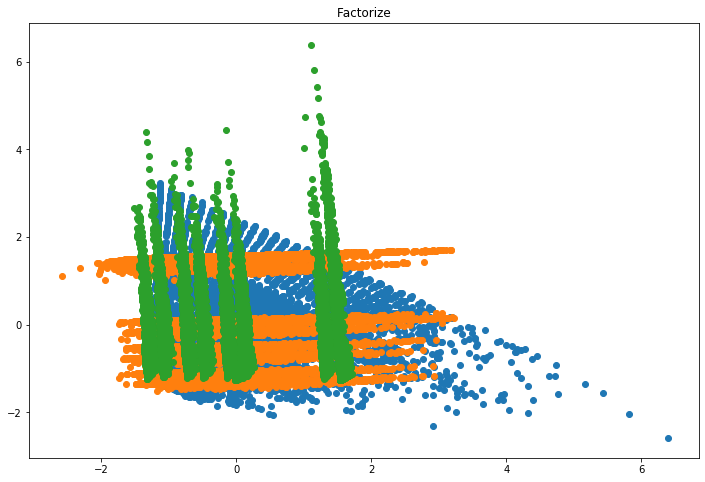

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.title('Factoranalysis')
plt.scatter(FA_result[:, 0], FA_result[:, 1])
plt.scatter(FA_result[:, 1], FA_result[:, 2])
plt.scatter(FA_result[:, 2], FA_result[:, 0])

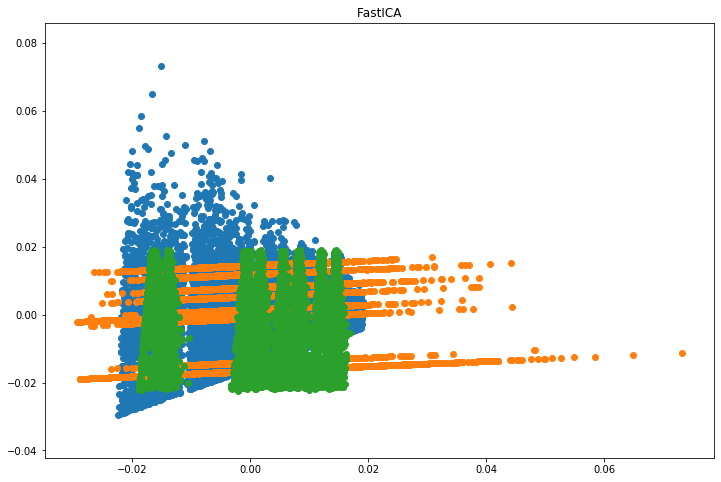

In [36]:
#--------------------------------------------------------------------
from sklearn.decomposition import FastICA
ICA = FastICA(n_components=3)

ICA = ICA.fit(numeric_data)
ICA_result = ICA.transform(numeric_data)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.title('FastICA')
plt.scatter(ICA_result[:, 0], ICA_result[:, 1])
plt.scatter(ICA_result[:, 1], ICA_result[:, 2])
plt.scatter(ICA_result[:, 2], ICA_result[:, 0])

In [30]:
#PCA&KPCA-------------------------------------------------
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=2)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)

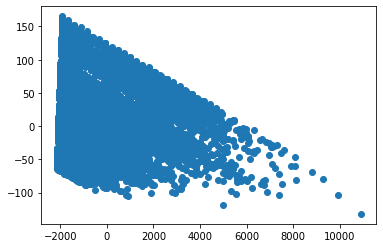

In [32]:
pca = pca.fit(numeric_data)
pca_result = pca.transform(numeric_data)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.show()

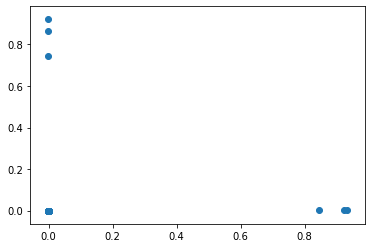

In [37]:
kpca = kpca.fit(numeric_data)
kpca_result = kpca.transform(numeric_data)
plt.scatter(kpca_result[:, 0], kpca_result[:, 1])
plt.show()

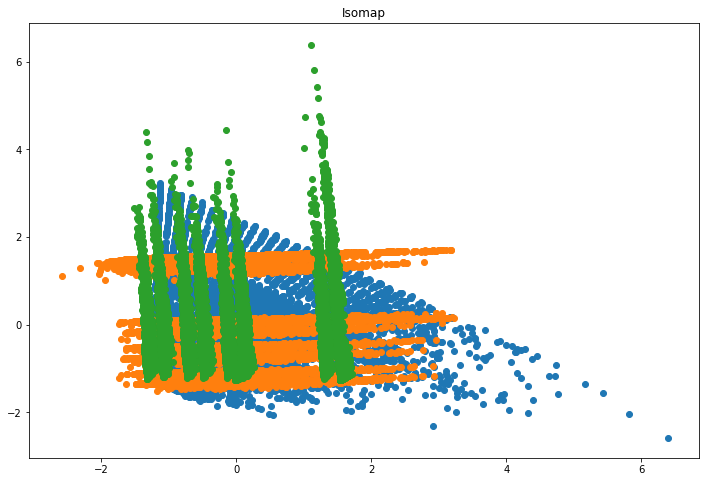

In [40]:
from sklearn.manifold import Isomap
isomap = Isomap(n_neighbors=5, n_components=3, n_jobs=-1)
isomap = isomap.fit(numeric_datBa)
isomap_result = isomap.transform(numeric_data)
plt.figure(figsize=(12, 8))
plt.title('Isomap')
plt.scatter(FA_result[:, 0], FA_result[:, 1])
plt.scatter(FA_result[:, 1], FA_result[:, 2])
plt.scatter(FA_result[:, 2], FA_result[:, 0])

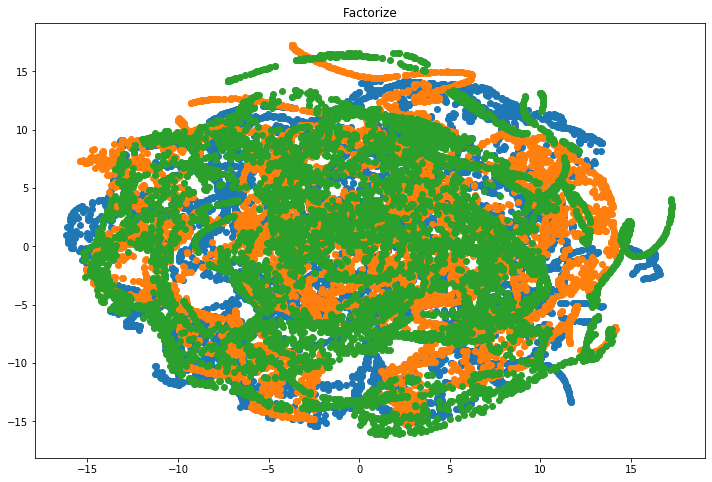

In [41]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter=400)
tsne_result = tsne.fit_transform(numeric_data)

plt.figure(figsize=(12, 8))
plt.title('Factorize')
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.scatter(tsne_result[:, 1], tsne_result[:, 2])
plt.scatter(tsne_result[:, 2], tsne_result[:, 0])